#### Import Libraries

In [6]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Model Libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor


import warnings

#### Import Data as Pandas DataFrame

In [14]:
df = pd.read_csv('data/students.csv')

#### Show Top 5 Records

In [15]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y variables

In [16]:
# Independent feature
X = df.drop(columns=['MathScore'], axis=1)
# All columns except MathScore are independent features on which the Math score depends on

In [17]:
X.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ReadingScore,WritingScore
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [18]:
y = df['MathScore']

In [19]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: MathScore, dtype: int64

In [20]:
# Create column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer # responsible to transform your columns/datapoints

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [21]:
X = preprocessor.fit_transform(X)

In [25]:
X.shape

(30641, 19)

In [27]:
# Seperate the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((24512, 19), (6129, 19))

#### Create an Evaluate Function to give all metrics after Model Training

In [28]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    return mae, mse, rmse

In [33]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoostRegressor": CatBoostRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor()
}
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # train model

    # make prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # evaluate train and test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance for Training set")
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print("----------------------------------------")
    
    print("Model performance for Testing set")
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print("="*35)
    print("\n")
    

LinearRegression
Model performance for Training set
- Root Mean Squared Error: 28.7712
- Mean Absolute Error: 4.2973
- R2 Score: 5.3639
----------------------------------------
Model performance for Testing set
- Root Mean Squared Error: 29.3859
- Mean Absolute Error: 4.3417
- R2 Score: 5.4209


Lasso
Model performance for Training set
- Root Mean Squared Error: 44.1920
- Mean Absolute Error: 5.3314
- R2 Score: 6.6477
----------------------------------------
Model performance for Testing set
- Root Mean Squared Error: 45.5769
- Mean Absolute Error: 5.4177
- R2 Score: 6.7511


Ridge
Model performance for Training set
- Root Mean Squared Error: 28.7646
- Mean Absolute Error: 4.2970
- R2 Score: 5.3633
----------------------------------------
Model performance for Testing set
- Root Mean Squared Error: 29.3808
- Mean Absolute Error: 4.3422
- R2 Score: 5.4204


KNeighborsRegressor
Model performance for Training set
- Root Mean Squared Error: 23.6883
- Mean Absolute Error: 3.8864
- R2 Score:

In [35]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=["Model Name","R2_Score"]).sort_values(by=["R2_Score"],ascending= False)

,Model Name,R2_Score
4,DecisionTreeRegressor,7.733899
1,Lasso,6.751070
3,KNeighborsRegressor,6.021611
5,RandomForestRegressor,5.988825
8,AdaBoostRegressor,5.983252
6,XGBRegressor,5.579354
7,CatBoostRegressor,5.479326
0,LinearRegression,5.420875
2,Ridge,5.420407


#### Linear Regression

In [38]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 87.45


#### Ridge Regression

In [40]:
ridge_model = Ridge(fit_intercept=True)
ridge_model = ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 87.46


#### Plot y_pred and y_test

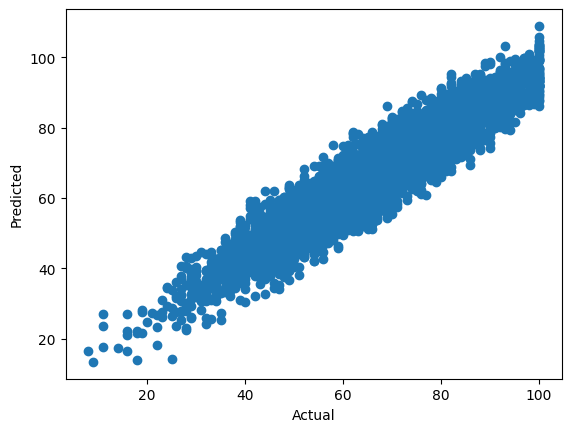

In [42]:
plt.scatter(y_test, y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

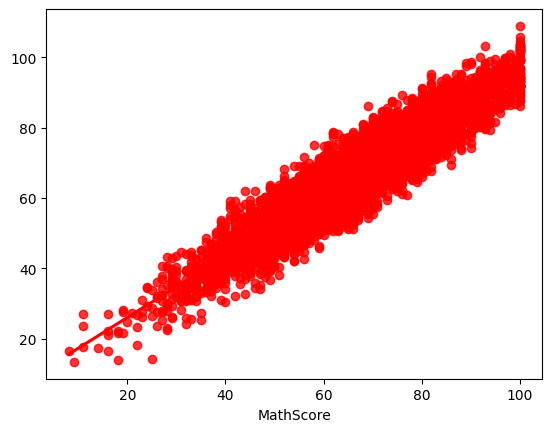

In [43]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red');

#### Difference between Actual and Predicted Values

In [44]:
pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_test-y_pred})
pred_df

,Actual Value,Predicted Value
21861,73,-1.497877
1278,98,4.013987
19134,52,2.496571
4577,39,-10.664634
29547,61,8.257009
...,...,...
2505,73,-7.105939
6911,92,-3.863348
24029,41,-0.886491
6088,69,-17.087646


: 